In [45]:
# Dependencies
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats
from scipy.stats import sem, ttest_ind
import seaborn as sns

In [102]:
# Add files
rpm_data = os.path.join("RPM_edit.csv")
per_data = os.path.join("player_PER.csv")
salary_data = os.path.join("team_salary_experience.csv")

In [103]:
# Read in rpm csv file
salary_df = pd.read_csv(salary_data)
salary_df.head()

,TEAM,rotation_PL,rotation_HT (cm),rotation_WT (kg),rotation_AG,rotation_EX,rotation_SAL,rotation_CY,Team_Abb,roster_PL,...,roster_EX,roster_SAL,roster_CY,starter_PL,starter_HT (cm),starter_WT (kg),starter_AG,starter_EX,starter_SAL,starter_CY
0,Atlanta Hawks,16,198.9,94.1,24.9,1.6,$4.2M,2.7,ATL,16,...,2.0,$4.2M,2.8,5,201.6,98.6,26.6,3.8,$10.7M,3.2
1,Boston Celtics,12,199.3,101.8,25.5,3.6,$6.8M,2.7,BOS,16,...,3.2,$7.2M,2.9,5,202.2,102.4,25.8,4.4,$12.3M,3.2
2,Brooklyn Nets,14,200.2,98.1,25.1,3.4,$5.2M,2.2,BKN,15,...,3.7,$5.9M,2.4,5,199.2,94.4,25.4,3.8,$8.5M,2.6
3,Charlotte Hornets,12,201.2,98.8,25.8,5.1,$9.5M,2.9,CHA,14,...,4.6,$8.4M,2.9,5,201.2,101.4,28.6,9.0,$16.8M,2.8
4,Chicago Bulls,17,200.7,98.4,24.8,2.4,$3.8M,2.8,CHI,15,...,2.7,$4.2M,3.0,5,203.0,99.4,25.4,3.0,$5.7M,3.4


In [89]:
salary_df.columns

Index(['TEAM', 'rotation_PL', 'rotation_HT (cm)', 'rotation_WT (kg)',
       'rotation_AG', 'rotation_EX', 'rotation_SAL', 'rotation_CY', 'Team_Abb',
       'roster_PL', 'roster_HT (cm)', 'roster_WT (kg)', 'roster_AG',
       'roster_EX', 'roster_SAL', 'roster_CY', 'starter_PL', 'starter_HT (cm)',
       'starter_WT (kg)', 'starter_AG', 'starter_EX', 'starter_SAL',
       'starter_CY'],
      dtype='object')

In [104]:
# Read in rpm csv file
rpm_df = pd.read_csv(rpm_data)
rpm_df.head()

,NAME,POS,team,GP,MPG,ORPM,DRPM,RPM,WINS,Unnamed: 9,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,Kent Bazemore,SG,ATL,65,27.5,0.21,0.88,1.09,4.84,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dewayne Dedmon,C,ATL,62,24.9,-1.02,1.72,0.70,3.82,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mike Muscala,PF,ATL,53,20.0,0.15,0.39,0.54,2.56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,John Collins,PF,ATL,74,24.1,-1.51,0.96,-0.55,2.97,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Damion Lee,SG,ATL,15,26.9,-1.78,0.80,-0.98,0.58,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# Rename NAME column to PLAYER
rpm_df = rpm_df.rename(columns={'NAME': 'PLAYER'})
rpm_df.head()

,PLAYER,POS,team,GP,MPG,ORPM,DRPM,RPM,WINS,Unnamed: 9,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,Kent Bazemore,SG,ATL,65,27.5,0.21,0.88,1.09,4.84,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dewayne Dedmon,C,ATL,62,24.9,-1.02,1.72,0.70,3.82,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mike Muscala,PF,ATL,53,20.0,0.15,0.39,0.54,2.56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,John Collins,PF,ATL,74,24.1,-1.51,0.96,-0.55,2.97,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Damion Lee,SG,ATL,15,26.9,-1.78,0.80,-0.98,0.58,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Read in per csv file
per_df = pd.read_csv(per_data)
per_df.head()

,RK,PLAYER,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,TEAM
0,49.0,John Wall,41.0,34.4,0.515,29.7,11.9,30.3,1.8,10.2,6.0,19.20,172.5,5.8,WAS
1,56.0,Bradley Beal,82.0,36.3,0.564,16.7,9.6,26.8,2.3,11.5,6.9,18.51,355.7,11.9,WAS
2,57.0,Otto Porter Jr.,77.0,31.6,0.602,13.4,6.4,17.7,4.8,18.1,11.4,18.37,285.6,9.5,WAS
3,134.0,Tomas Satoransky,73.0,22.5,0.615,36.0,10.4,14.8,5.0,11.1,8.0,15.35,119.0,4.0,WAS
4,151.0,Marcin Gortat,82.0,25.3,0.546,17.1,11.2,15.2,9.9,24.0,17.0,14.70,127.0,4.2,WAS


In [36]:
# Merge rpm_df and per_df on PLAYER
rpm_per_merge = pd.merge(rpm_df, per_df, on="PLAYER")
rpm_per_merge.head()

,PLAYER,POS,TEAM_x,GP_x,MPG_x,ORPM,DRPM,RPM,WINS,RK,...,AST,TO,USG,ORR,DRR,REBR,PER,VA,EWA,TEAM_y
0,Chris Paul,PG,HOU,58,31.8,5.44,1.60,7.04,11.80,15.0,...,30.9,8.6,25.4,2.3,16.7,9.5,24.39,369.2,12.3,HOU
1,Stephen Curry,PG,GS,51,32.0,6.67,0.21,6.88,11.23,4.0,...,21.2,10.5,30.0,2.7,14.4,9.0,28.32,421.7,14.1,GSW
2,James Harden,PG,HOU,72,35.4,6.80,-0.13,6.67,15.97,1.0,...,23.2,11.6,35.9,1.8,15.2,8.6,29.87,718.5,23.9,HOU
3,Jimmy Butler,SG,MIN,59,36.7,3.61,2.84,6.45,12.88,18.0,...,19.1,7.2,24.6,4.2,12.7,8.4,23.70,426.4,14.2,MIN
4,Victor Oladipo,SG,IND,75,34.0,2.76,3.25,6.01,14.93,19.0,...,15.8,10.7,29.1,2.1,15.1,8.6,23.12,480.7,16.0,IND


In [37]:
rpm_per_merge.columns

Index(['PLAYER', 'POS', 'TEAM_x', 'GP_x', 'MPG_x', 'ORPM', 'DRPM', 'RPM',
       'WINS', 'RK', 'GP_y', 'MPG_y', 'TS%', 'AST', 'TO', 'USG', 'ORR', 'DRR',
       'REBR', 'PER', 'VA', 'EWA', 'TEAM_y'],
      dtype='object')

In [38]:
# Groupby TEAM and RPM, DRPM, ORPM Score (calculate average team score)
team_rpm = rpm_per_merge.groupby("TEAM_y")["RPM"].mean()
team_drpm = rpm_per_merge.groupby("TEAM_y")["DRPM"].mean()
team_orpm = rpm_per_merge.groupby("TEAM_y")["ORPM"].mean()
team_orpm.head()

TEAM_y
ATL   -0.965455
BKN   -0.418182
BOS   -0.762308
CHA   -0.428333
CHI   -1.401429
Name: ORPM, dtype: float64

In [39]:
# Create new df
team_rpm_df = pd.DataFrame({"RPM": team_rpm,
                           "DRPM": team_drpm,
                           "ORPM": team_orpm,
                           })

# Reset Index
team_rpm_df.reset_index(level=0, inplace=True)

team_rpm_df.head()

,TEAM_y,DRPM,ORPM,RPM
0,ATL,-0.461818,-0.965455,-1.427273
1,BKN,-0.561818,-0.418182,-0.980000
2,BOS,0.571538,-0.762308,-0.190769
3,CHA,-0.279167,-0.428333,-0.707500
4,CHI,-0.711429,-1.401429,-2.112857


In [40]:
# Add win csv file
win_data = os.path.join("team_win_data.csv")

In [41]:
# Read in win csv file
win_df = pd.read_csv(win_data)
win_df.head()

,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference,Team_Abb
0,Toronto Raptors* (1),59,23,0.720,—,111.7,103.9,7.29,East,TOR
1,Boston Celtics* (2),55,27,0.671,4,104.0,100.4,3.23,East,BOS
2,Philadelphia 76ers* (3),52,30,0.634,7,109.8,105.3,4.30,East,PHI
3,Cleveland Cavaliers* (4),50,32,0.610,9,110.9,109.9,0.59,East,CLE
4,Indiana Pacers* (5),48,34,0.585,11,105.6,104.2,1.18,East,IND


In [42]:
# Rename NAME column to PLAYER
team_rpm_df = team_rpm_df.rename(columns={'TEAM_y': 'Team_Abb'})
team_rpm_df.head()

,Team_Abb,DRPM,ORPM,RPM
0,ATL,-0.461818,-0.965455,-1.427273
1,BKN,-0.561818,-0.418182,-0.980000
2,BOS,0.571538,-0.762308,-0.190769
3,CHA,-0.279167,-0.428333,-0.707500
4,CHI,-0.711429,-1.401429,-2.112857


In [83]:
# Merge team_rpm_df and win_df on Team_Abb
team_rpm_win_merge = pd.merge(win_df, team_rpm_df, on="Team_Abb")
team_rpm_win_merge.head()

,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference,Team_Abb,DRPM,ORPM,RPM
0,Toronto Raptors* (1),59,23,0.720,—,111.7,103.9,7.29,East,TOR,0.303636,0.805455,1.109091
1,Boston Celtics* (2),55,27,0.671,4,104.0,100.4,3.23,East,BOS,0.571538,-0.762308,-0.190769
2,Philadelphia 76ers* (3),52,30,0.634,7,109.8,105.3,4.30,East,PHI,0.356923,-0.051538,0.305385
3,Cleveland Cavaliers* (4),50,32,0.610,9,110.9,109.9,0.59,East,CLE,-0.374167,0.585833,0.211667
4,Indiana Pacers* (5),48,34,0.585,11,105.6,104.2,1.18,East,IND,-0.059000,-0.030000,-0.089000


In [69]:
# Sorted df by team wins
new_team_df = team_rpm_win_merge.sort_values(by=['W'], ascending=False)
new_team_df.head()

,Team Name,W,L,W/L%,GB,PS/G,PA/G,SRS,conference,Team_Abb,DRPM,ORPM,RPM
15,Houston Rockets* (1),65,17,0.793,—,112.4,103.9,8.21,West,HOU,0.425455,0.738182,1.163636
0,Toronto Raptors* (1),59,23,0.720,—,111.7,103.9,7.29,East,TOR,0.303636,0.805455,1.109091
16,Golden State Warriors* (2),58,24,0.707,7,113.5,107.5,5.79,West,GSW,0.619333,0.238000,0.857333
1,Boston Celtics* (2),55,27,0.671,4,104.0,100.4,3.23,East,BOS,0.571538,-0.762308,-0.190769
2,Philadelphia 76ers* (3),52,30,0.634,7,109.8,105.3,4.30,East,PHI,0.356923,-0.051538,0.305385


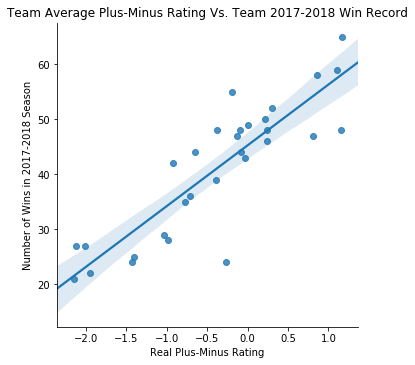

In [119]:
# Create graph that shows average team roster experience vs. team win record (seperate conferences)
rpm_vs_wins = sns.lmplot(x="RPM", y="W", data=team_rpm_win_merge, aspect=1)
rpm_vs_wins.set(xlabel="Real Plus-Minus Rating", ylabel="Number of Wins in 2017-2018 Season")
plt.title("Team Average Plus-Minus Rating Vs. Team 2017-2018 Win Record")
plt.savefig("team_RPM_vs_wins.png")

In [124]:
#calulate the linear regression r-squared and p.value
slope, intercept, r_value, p_value, std_err = stats.linregress(x=new_team_df["RPM"], y= new_team_df["W"])
r_squared=r_value**2
print("r_squared = " , r_squared )
print("p_value = ", p_value)

r_squared =  0.7568065361367431
p_value =  4.3030532911225903e-10


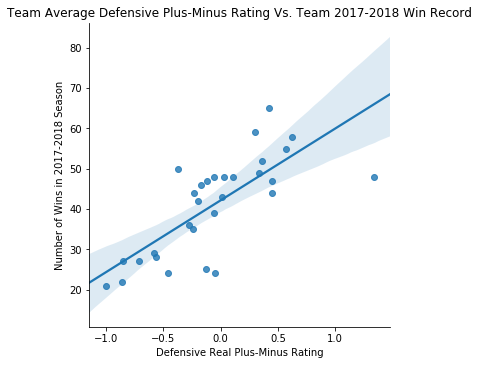

In [114]:
# Create graph that shows average team roster experience vs. team win record (seperate conferences)
drpm_vs_wins = sns.lmplot(x="DRPM", y="W", data=team_rpm_win_merge, aspect=1)
drpm_vs_wins.set(xlabel="Defensive Real Plus-Minus Rating", ylabel="Number of Wins in 2017-2018 Season")
plt.title("Team Average Defensive Plus-Minus Rating Vs. Team 2017-2018 Win Record")
plt.savefig("team_DRPM_vs_wins.png")

In [122]:
#calulate the linear regression r-squared and p.value
slope, intercept, r_value, p_value, std_err = stats.linregress(x=new_team_df["DRPM"], y= new_team_df["W"])
r_squared=r_value**2
print("r_squared = " , r_squared )
print("p_value = ", p_value)

r_squared =  0.5562937327221865
p_value =  2.2400773134382533e-06


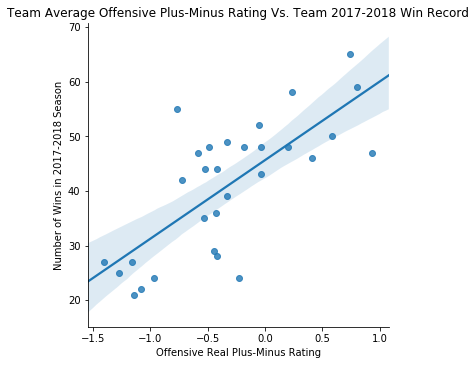

In [115]:
# Create graph that shows average team roster experience vs. team win record (seperate conferences)
orpm_vs_wins = sns.lmplot(x="ORPM", y="W", data=team_rpm_win_merge, aspect=1)
orpm_vs_wins.set(xlabel="Offensive Real Plus-Minus Rating", ylabel="Number of Wins in 2017-2018 Season")
plt.title("Team Average Offensive Plus-Minus Rating Vs. Team 2017-2018 Win Record")
plt.savefig("team_ORPM_vs_wins.png")

In [84]:
#calulate the linear regression r-squared and p.value
slope, intercept, r_value, p_value, std_err = stats.linregress(x=new_team_df["ORPM"], y= new_team_df["W"])
r_squared=r_value**2
print("r_squared = " , r_squared )
print("p_value = ", p_value)

r_squared =  0.5359575856374047
p_value =  4.2652061723376665e-06


In [73]:
# Create new lists for new dataframe
team = []
rpm_type = []
score = []
wins = []
new_type = ["RPM", "DRPM", "ORPM"]

# create a loop to append data to new lists
for row in range(30):
#     print(experience_summary_df.iloc[row][0])
    for x in range(len(new_type)):
        team.append(new_team_df.iloc[row][9])
        rpm_type.append(new_type[x])
        score.append(new_team_df.iloc[row][10 + x])
        wins.append(new_team_df.iloc[row][1])

# create new dataframe
new_df = pd.DataFrame({"Team_Abb": team,
                  "rpm_type": rpm_type,
                  "Avg_Score": score,
                  "W": wins})


new_df.head()

,Avg_Score,Team_Abb,W,rpm_type
0,0.425455,HOU,65,RPM
1,0.738182,HOU,65,DRPM
2,1.163636,HOU,65,ORPM
3,0.303636,TOR,59,RPM
4,0.805455,TOR,59,DRPM


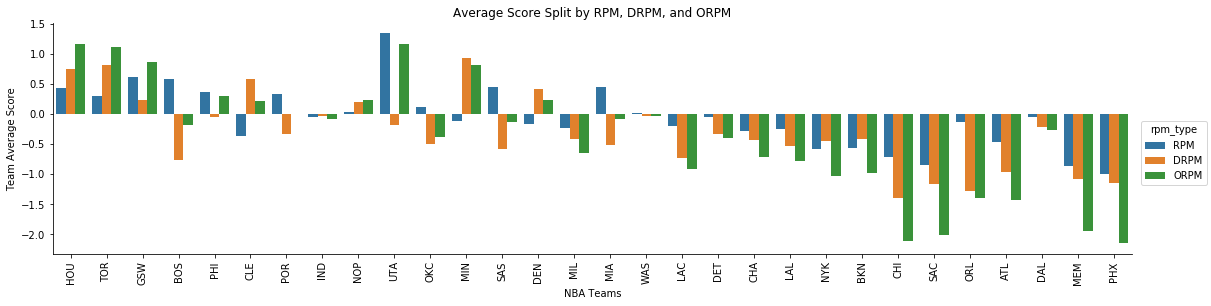

In [116]:
# Create bar graph for each team in desending order from most team wins to least team wins
# Each team shows average roster, roation, and starter experience
graph = sns.factorplot(x="Team_Abb", y="Avg_Score",
                   hue="rpm_type",
                   data=new_df, kind="bar",
                   size=4, aspect=4)
plt.xticks(rotation=90)
plt.title("Average Score Split by RPM, DRPM, and ORPM")
plt.xlabel("NBA Teams")
plt.ylabel("Team Average Score")
plt.savefig("team_RPMs_bar.png")